In [1]:
%matplotlib inline

# StackingRegressor

An ensemble-learning meta-regressor for stacking regression

> from mlxtend.regressor import StackingRegressor

## Overview

Stacking regression is an ensemble learning technique to combine multiple regression models via a meta-regressor. The individual regression models are trained based on the complete training set; then, the meta-regressor is fitted based on the outputs -- meta-features -- of the individual regression models in the ensemble.

![](./StackingRegressor_files/stackingregression_overview.png)

### References


- Breiman, Leo. "[Stacked regressions.](http://link.springer.com/article/10.1023/A:1018046112532#page-1)" Machine learning 24.1 (1996): 49-64.

## Example 1 - Simple Stacked Regression

In [2]:
from mlxtend.regressor import StackingRegressor
from mlxtend.data import boston_housing_data
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np

# Generating a sample dataset
np.random.seed(1)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(8))

Mean Squared Error: 0.2039
Variance Score: 0.7049


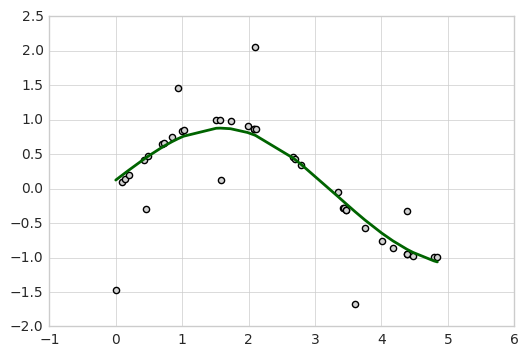

In [3]:
# Initializing models

lr = LinearRegression()
svr_lin = SVR(kernel='linear')
ridge = Ridge(random_state=1)
svr_rbf = SVR(kernel='rbf')

stregr = StackingRegressor(regressors=[svr_lin, lr, ridge], 
                           meta_regressor=svr_rbf)

# Training the stacking classifier

stregr.fit(X, y)
stregr.predict(X)

# Evaluate and visualize the fit

print("Mean Squared Error: %.4f"
      % np.mean((stregr.predict(X) - y) ** 2))
print('Variance Score: %.4f' % stregr.score(X, y))

with plt.style.context(('seaborn-whitegrid')):
    plt.scatter(X, y, c='lightgray')
    plt.plot(X, stregr.predict(X), c='darkgreen', lw=2)

plt.show()

In [4]:
stregr

StackingRegressor(meta_regressor=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
         regressors=[SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False), Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=1, solver='auto', tol=0.001)],
         verbose=0)

## Example 2 - Stacked Regression and GridSearch

To set up a parameter grid for scikit-learn's `GridSearch`, we simply provide the estimator's names in the parameter grid -- in the special case of the meta-regressor, we append the `'meta-'` prefix.

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Initializing models

lr = LinearRegression()
svr_lin = SVR(kernel='linear')
ridge = Ridge(random_state=1)
lasso = Lasso(random_state=1)
svr_rbf = SVR(kernel='rbf')
regressors = [svr_lin, lr, ridge, lasso]
stregr = StackingRegressor(regressors=regressors, 
                           meta_regressor=svr_rbf)

params = {'lasso__alpha': [0.1, 1.0, 10.0],
          'ridge__alpha': [0.1, 1.0, 10.0],
          'svr__C': [0.1, 1.0, 10.0],
          'meta-svr__C': [0.1, 1.0, 10.0, 100.0],
          'meta-svr__gamma': [0.1, 1.0, 10.0]}

grid = GridSearchCV(estimator=stregr, 
                    param_grid=params, 
                    cv=5,
                    refit=True)
grid.fit(X, y)

for params, mean_score, scores in grid.grid_scores_:
        print("%0.3f +/- %0.2f %r"
              % (mean_score, scores.std() / 2.0, params))

-9.810 +/- 6.86 {'lasso__alpha': 0.1, 'svr__C': 0.1, 'ridge__alpha': 0.1, 'meta-svr__C': 0.1, 'meta-svr__gamma': 0.1}
-9.591 +/- 6.67 {'lasso__alpha': 0.1, 'svr__C': 1.0, 'ridge__alpha': 0.1, 'meta-svr__C': 0.1, 'meta-svr__gamma': 0.1}
-9.591 +/- 6.67 {'lasso__alpha': 0.1, 'svr__C': 10.0, 'ridge__alpha': 0.1, 'meta-svr__C': 0.1, 'meta-svr__gamma': 0.1}
-9.819 +/- 6.87 {'lasso__alpha': 0.1, 'svr__C': 0.1, 'ridge__alpha': 1.0, 'meta-svr__C': 0.1, 'meta-svr__gamma': 0.1}
-9.600 +/- 6.68 {'lasso__alpha': 0.1, 'svr__C': 1.0, 'ridge__alpha': 1.0, 'meta-svr__C': 0.1, 'meta-svr__gamma': 0.1}
-9.600 +/- 6.68 {'lasso__alpha': 0.1, 'svr__C': 10.0, 'ridge__alpha': 1.0, 'meta-svr__C': 0.1, 'meta-svr__gamma': 0.1}
-9.878 +/- 6.91 {'lasso__alpha': 0.1, 'svr__C': 0.1, 'ridge__alpha': 10.0, 'meta-svr__C': 0.1, 'meta-svr__gamma': 0.1}
-9.665 +/- 6.71 {'lasso__alpha': 0.1, 'svr__C': 1.0, 'ridge__alpha': 10.0, 'meta-svr__C': 0.1, 'meta-svr__gamma': 0.1}
-9.665 +/- 6.71 {'lasso__alpha': 0.1, 'svr__C': 10.0

/Users/Sebastian/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_search.py:662: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Mean Squared Error: 0.1844
Variance Score: 0.7331


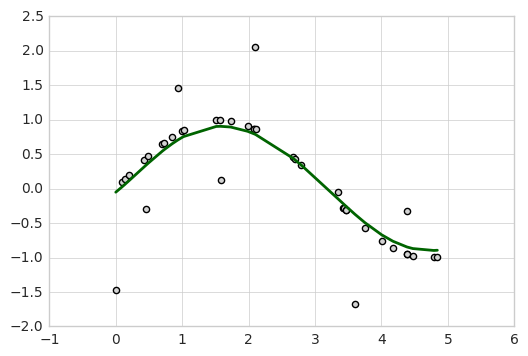

In [6]:
# Evaluate and visualize the fit
print("Mean Squared Error: %.4f"
      % np.mean((grid.predict(X) - y) ** 2))
print('Variance Score: %.4f' % grid.score(X, y))

with plt.style.context(('seaborn-whitegrid')):
    plt.scatter(X, y, c='lightgray')
    plt.plot(X, grid.predict(X), c='darkgreen', lw=2)

plt.show()

In case we are planning to use a regression algorithm multiple times, all we need to do is to add an additional number suffix in the parameter grid as shown below:

## API

In [1]:
with open('../../api_modules/mlxtend.regressor/StackingRegressor.md', 'r') as f:
    print(f.read())

## StackingRegressor

*StackingRegressor(regressors, meta_regressor, verbose=0)*

A Stacking regressor for scikit-learn estimators for regression.

**Parameters**

- `regressors` : array-like, shape = [n_regressors]

    A list of regressors.
    Invoking the `fit` method on the `StackingRegressor` will fit clones
    of those original regressors that will
    be stored in the class attribute
    `self.regr_`.

- `meta_regressor` : object

    The meta-regressor to be fitted on the ensemble of
    regressors

- `verbose` : int, optional (default=0)

    Controls the verbosity of the building process.
    - `verbose=0` (default): Prints nothing
    - `verbose=1`: Prints the number & name of the regressor being fitted
    - `verbose=2`: Prints info about the parameters of the
    regressor being fitted
    - `verbose>2`: Changes `verbose` param of the underlying regressor to
    self.verbose - 2

**Attributes**

- `regr_` : list, shape=[n_regressors]

    Fitted regressors (clones of the